In [1]:
import sys
import os

import numpy as np
from numpy import random
import pandas as pd
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
%matplotlib inline
from tqdm import tqdm_notebook

PARENT_DIR = os.path.realpath('..')
import importlib
if PARENT_DIR not in sys.path:
    sys.path.append(PARENT_DIR)

try: importlib.reload(sl)
except: import synt_lib as sl

In [2]:
DIRS = sl.get_dirs(parent_dir=PARENT_DIR)
M_PARAMS = sl.get_model_params()

In [4]:
quant = M_PARAMS['QUANTIZATION_CHANNELS']
nbits = int(np.log2(quant))

# Build model

# Get Data

Всего файлов:
* Обучение (cv-valid-train): 391552
* cv-valid-dev: 8152
* cv-valid-test: 7990

# Develop models

## DocToVec

## WaveGRU

In [116]:
import DWave4
DWave4 = importlib.reload(DWave4)

In [117]:
import pickle

In [118]:
model_name = "final1_256"

In [119]:
with open(DIRS['MODELS']+model_name+'/model_params.pickle','rb') as f:
    model_params = pickle.load(f)

In [120]:
model_params['M_O1V:0'] = model_params['M_O1V']
model_params['M_O2V:0'] = model_params['M_O2V']
model_params['M_O3V:0'] = model_params['M_O3V']
model_params['M_O4V:0'] = model_params['M_O4V']

In [121]:
model_params['O4:0'].shape

(128, 256)

In [122]:
gru.P_ct_fl_unscaled

<tf.Tensor 'add_1:0' shape=(?, 256) dtype=float32>

In [123]:
tf.reset_default_graph()
sess = tf.Session()
gru = DWave4.WaveGRU(3, 64, n_batches=1, restore_variables=model_params, hidden_size=256)
#gru = DWave4.WaveGRU(3, 64, n_batches=1, restore_variables=None, hidden_size=256)
sess.run(tf.global_variables_initializer())

In [124]:
txt_emb = np.zeros((1,61))

In [125]:
generated_audio = gru.generate_audio(txt_emb, sess, seconds=1, show_tqdm=True)

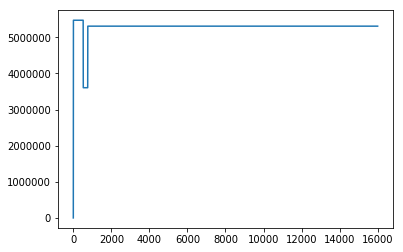

In [126]:
plt.plot(generated_audio)

In [127]:
generated_x = gru.generate(txt_emb, sess, seconds=1, show_tqdm=True)

In [129]:
x = np.concatenate(generated_x,1)

In [133]:
x = x[0,:,0]*256+x[0,:,1]

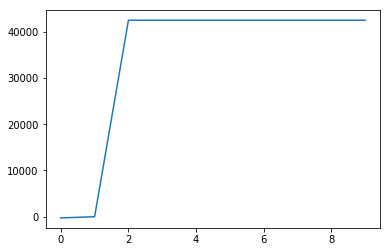

In [135]:
plt.plot(x[:10])

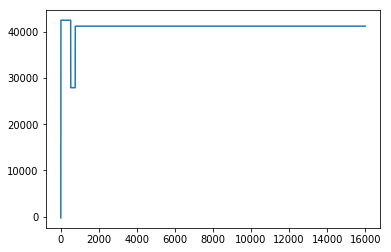

In [136]:
plt.plot(x)

In [41]:
generated_audio/256

array([      0.,   32896., 5472384., ..., 5308544., 5308544., 5308544.])

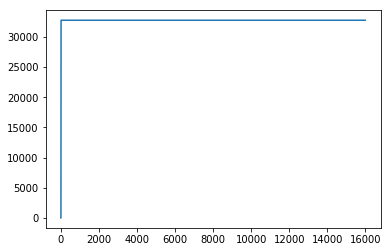

In [81]:
plt.plot(generated_audio)

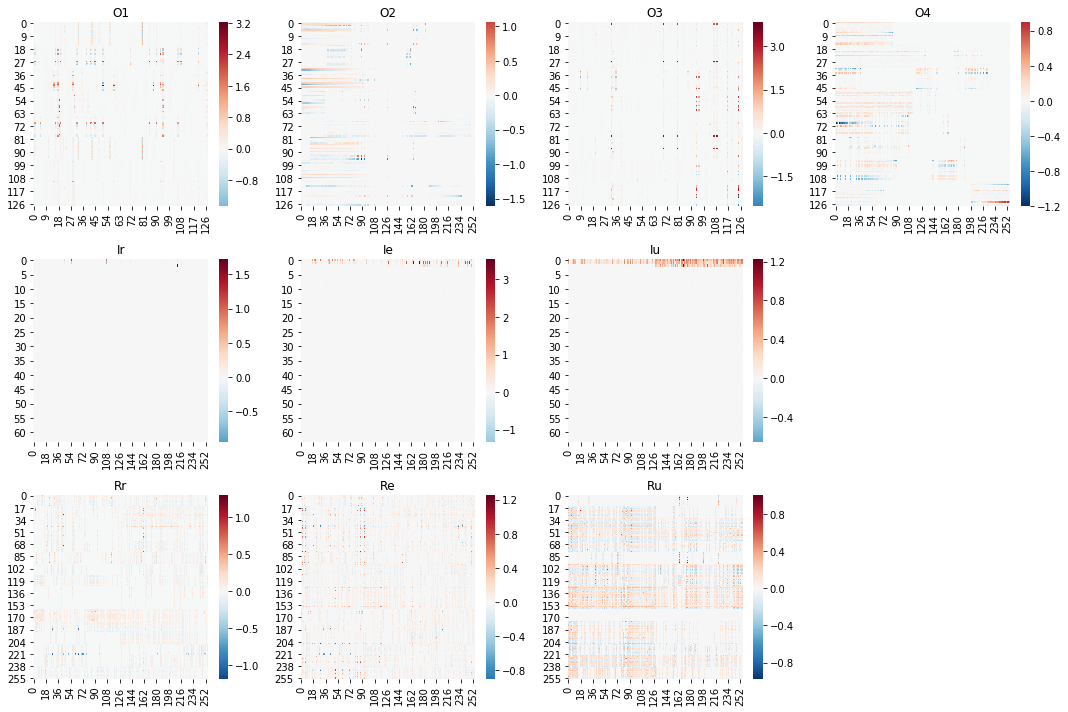

In [14]:
plt.figure(figsize=(15,10))
for idx,name in enumerate(['O1', 'O2','O3','O4','Ir','Ie','Iu','','Rr','Re','Ru','']):
    if name=='': continue
    plt.subplot(3,4,idx+1)
    sns.heatmap(model_params[name+':0'], center=0, cmap='RdBu_r')
    plt.title(name)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(gru_losses)

In [ ]:
saver.save(sess, DIRS['MODELS']+model_name+'/final_',write_meta_graph=True)

In [ ]:
gener_audio = gru.generate_audio(txt_emb, sess, seconds=1, show_tqdm=True)

In [ ]:
audio_real = audio*128+128
audio_real = audio_real[:,0]*256+audio_real[:,1]

In [ ]:
t

In [ ]:
plt.plot(audio_real)

In [ ]:
gener_audio

In [ ]:
plt.plot(gener_audio)

In [ ]:
h_t = np.zeros((gru.n_batches, gru.hidden_size), dtype='float32')
x = np.zeros((gru.n_batches, 1, gru.input_dim), dtype='float32')

In [ ]:
x = audio_resh[:,0].reshape(gru.n_batches, 1, gru.input_dim-1)

In [ ]:
c = x[:,:,0]
c_shift = np.hstack([c, [[0]]*gru.n_batches])[:,1:]
c_shift = c_shift.reshape(gru.n_batches,-1,1)
x = np.concatenate([x, c_shift],2)

In [ ]:
xs = [x[:,:,:2]]

In [ ]:
n_iters = 10

In [ ]:
feed_dict={gru.sound_X:x, gru.h_0:h_t, gru.txt_embed_plh:txt_emb}

In [ ]:
c_t = sess.run(gru.c_t, feed_dict=feed_dict)

In [ ]:
c_t

In [ ]:

#for i in tqdm_notebook(range(n_iters), disable=not show_tqdm):
    c_t = session.run(self.c_t, feed_dict=feed_dict)
    x[:,0,2] = c_t[:,0,0]
    feed_dict={self.sound_X:x, self.h_0:h_t, self.txt_embed_plh:txt_emb}
    x, h_t = session.run([self.y, self.h_t_trans], feed_dict=feed_dict) 
    x = np.concatenate([x,np.zeros((self.n_batches,1,1))],2)
    h_t = h_t[0] #[1,n_batches,hidden_size] -> [n_batches, hidden_size]
    xs.append(x[:,:,:2])